In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import font_manager, rc 
font_list=font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_name = font_manager.FontProperties(fname=font_list[47])
font_name.get_name()

rc('font', family='Century Gothic')


sns count 예측하기
-------------------------------------------------------------------------------
> 1. 미세먼지(pm)를 input으로 Count(sns 카운트의 로그값) 라벨 예측
> 2. machine learning의 regressors 사용
> 3. 제일 좋은 성능인 linear regressor를 이용한 예측값과 기존 라벨값을 비교

In [2]:
#sns_all = pd.read_csv('./df_all.csv')

In [3]:
df_air=pd.read_csv('./pre_air_out.csv', encoding='utf-8')
df_sns=pd.read_csv('./pre_sns.csv', encoding='utf-8')

In [4]:
df_air = df_air.drop(['hours'], axis = 1)
df_air = df_air.rename(columns={"Year": "YEAR", "Days": "DAY", "Month" : "MONTH"})
df_air = df_air.groupby(['YEAR','MONTH','DAY','serial']).agg(np.mean)

df_air = pd.DataFrame(df_air)
df_air.head()

df_all = pd.merge(left=df_air, right=df_sns, how='left',on =['YEAR','MONTH','DAY'])

In [5]:
df_air

pm10       pm25
YEAR MONTH DAY serial                        
2018 4     1   11110515  66.041667  31.375000
               11110530  67.833333  31.958333
               11110550  54.291667  24.583333
               11110560  76.291667  36.041667
               11110580  66.833333  31.500000
               11110600  66.250000  31.333333
               11110615  60.500000  29.333333
               11110630  60.458333  28.541667
               11110640  60.416667  28.416667
               11110650  60.291667  28.458333
               11110670  52.750000  25.291667
               11110690  57.208333  25.958333
               11110710  86.500000  39.916667
               11350560  65.333333  35.000000
               11350580  44.833333  21.583333
               11350595  52.708333  25.500000
               11350600  65.958333  32.833333
               11350611  50.541667  24.458333
               11350619  89.708333  44.041667
               11350625  64.208333  32.166667
               11350630  55.041667  22.791667
               11350640  70.750000  36.041667
               11350665  70.583333  36.500000
               11350670  65.791667  33.791667
               11350695  67.000000  34.416667
               11350720  71.041667  36.791667
           2   11110515  64.500000  24.833333
               11110530  66.666667  25.750000
               11110550  54.833333  20.708333
               11110560  70.083333  26.875000
...                            ...        ...
2019 3     30  11350665  37.833333  27.583333
               11350670  39.708333  28.791667
               11350695  39.833333  28.791667
               11350720  36.666667  26.625000
           31  11110515  57.958333  31.666667
               11110530  45.625000  27.541667
               11110550  45.166667  27.375000
               11110560  35.875000  19.958333
               11110580  32.625000  19.666667
               11110600  35.458333  21.583333
               11110615  39.625000  23.958333
               11110630  37.333333  22.666667
               11110640  39.458333  24.083333
               11110650  48.041667  29.708333
               11110670  38.958333  23.750000
               11110690  39.833333  24.291667
               11110710  34.541667  20.791667
               11350560  41.833333  29.166667
               11350580  35.250000  24.500000
               11350595  44.666667  31.208333
               11350600  35.458333  24.750000
               11350611  32.958333  22.791667
               11350619  48.083333  33.875000
               11350625  47.625000  33.416667
               11350630  35.375000  20.416667
               11350640  39.291667  27.208333
               11350665  38.833333  26.541667
               11350670  38.333333  26.500000
               11350695  38.250000  26.500000
               11350720  35.250000  24.666667

[8911 rows x 2 columns]

In [6]:
# #연월일로 되어있는 것을 Datetime으로 바꿈 (시간은 제외)
df_all['Datetime']=df_all['YEAR'].astype('str')+'-'+df_all['MONTH'].astype('str')+'-'+df_all['DAY'].astype('str')
df_all['Datetime']=pd.to_datetime(df_all['Datetime'], format='%Y-%m-%d')

In [7]:
pm25 = []
pm25 = df_all['pm25']

pm10 = []
pm10 = df_all['pm10']
print(type(pm10))

pm_pca = pd.concat([pm25,pm10], axis = 1)

df_all.drop(['pm25','pm10'], axis=1, inplace=True)

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_f = pca.fit_transform(pm_pca)
pca_df = pd.DataFrame(data = pca_f
             , columns = ['pm'])


df_all = df_all.reset_index(drop=True)
print(df_all.shape)
df_all.head()

<class 'pandas.core.series.Series'>
(8911, 5)


,YEAR,MONTH,DAY,Count,Datetime
0,2018,4,1,8.521185,2018-04-01
1,2018,4,1,8.521185,2018-04-01
2,2018,4,1,8.521185,2018-04-01
3,2018,4,1,8.521185,2018-04-01
4,2018,4,1,8.521185,2018-04-01


In [8]:
pca_df = pca_df.reset_index(drop=True)
print(pca_df.shape)
pca_df.head()

df_all[['pm']] = pca_df[['pm']]
# df_all = df_all.set_index(["Datetime"])



(8911, 1)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
data_train, data_test = train_test_split(df_all, test_size=0.3, random_state=42)

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 3578 to 7270
Data columns (total 6 columns):
YEAR        6237 non-null int64
MONTH       6237 non-null int64
DAY         6237 non-null int64
Count       6237 non-null float64
Datetime    6237 non-null datetime64[ns]
pm          6237 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 341.1 KB


In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2674 entries, 4575 to 6137
Data columns (total 6 columns):
YEAR        2674 non-null int64
MONTH       2674 non-null int64
DAY         2674 non-null int64
Count       2674 non-null float64
Datetime    2674 non-null datetime64[ns]
pm          2674 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 146.2 KB


In [13]:
data_train.shape

(6237, 6)

In [14]:
data_test.shape

(2674, 6)

In [15]:
#Copy for emergency:
TRAIN_RESERVE = data_train.copy()

In [16]:
#Data Preprocessing for Training Set

data_train

,YEAR,MONTH,DAY,Count,Datetime,pm
3578,2018,8,22,7.936303,2018-08-22,-17.211856
6391,2018,12,17,8.734077,2018-12-17,44.713575
5785,2018,11,22,8.367068,2018-11-22,-32.969893
4467,2018,9,30,7.449498,2018-09-30,-18.823705
1564,2018,5,31,8.667336,2018-05-31,-6.805500
1782,2018,6,9,8.106213,2018-06-09,-12.779461
6535,2018,12,23,8.367532,2018-12-23,24.691492
8649,2019,3,21,9.005650,2019-03-21,-15.761670
3017,2018,7,30,8.217978,2018-07-30,-32.674803
904,2018,5,5,8.115521,2018-05-05,9.549256


In [17]:
data_train.set_index('Datetime', True)

,YEAR,MONTH,DAY,Count,pm
Datetime,,,,,
2018-08-22,2018,8,22,7.936303,-17.211856
2018-12-17,2018,12,17,8.734077,44.713575
2018-11-22,2018,11,22,8.367068,-32.969893
2018-09-30,2018,9,30,7.449498,-18.823705
2018-05-31,2018,5,31,8.667336,-6.805500
2018-06-09,2018,6,9,8.106213,-12.779461
2018-12-23,2018,12,23,8.367532,24.691492
2019-03-21,2019,3,21,9.005650,-15.761670
2018-07-30,2018,7,30,8.217978,-32.674803


In [19]:
data_labels = data_train['Count']

In [20]:
data_labels.head()

3578    7.936303
6391    8.734077
5785    8.367068
4467    7.449498
1564    8.667336
Name: Count, dtype: float64

In [21]:
data = data_train.drop(['Count'], axis = 1)


In [22]:
data.head()

,YEAR,MONTH,DAY,Datetime,pm
3578,2018,8,22,2018-08-22,-17.211856
6391,2018,12,17,2018-12-17,44.713575
5785,2018,11,22,2018-11-22,-32.969893
4467,2018,9,30,2018-09-30,-18.823705
1564,2018,5,31,2018-05-31,-6.805500


In [23]:
#Now we should standartize the data (Subtract mean and divide by variance) and deal with categorical data
#In our case I decided to deal with cbwd with OrdinalEncoder and encoded City with OneHotEncoder

#Also I deleted precipitation and Iprec attributes as I found out that they don't have importance to the final result

In [24]:
#text_attributes = []
cat_attributes = ['YEAR',"MONTH","DAY"]
#del_attributes = []

#data = data.drop(del_attributes, axis=1)

num_attributes = list(data.columns)
num_attributes.remove('Datetime')
num_attributes.remove('YEAR')
num_attributes.remove("MONTH")
num_attributes.remove("DAY")
#num_attributes.remove('serial')

In [25]:
num_attributes

['pm']

In [26]:
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [27]:
transform_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(), cat_attributes),
        #("text", OrdinalEncoder(), text_attributes),
        ("num", StandardScaler(), num_attributes),
    ])

In [28]:
data_prepared = transform_pipeline.fit_transform(data)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [29]:
data_prepared

<6237x46 sparse matrix of type '<class 'numpy.float64'>'
	with 24948 stored elements in Compressed Sparse Row format>

In [30]:
data_labels

3578    7.936303
6391    8.734077
5785    8.367068
4467    7.449498
1564    8.667336
1782    8.106213
6535    8.367532
8649    9.005650
3017    8.217978
904     8.115521
8612    8.823795
3968    7.906179
8835    8.806574
8524    8.898502
2080    8.381832
1565    8.667336
4721    8.108623
5209    8.411833
6568    8.565793
3393    7.701200
8840    8.806574
4794    8.789051
8202    8.713911
7176    8.668196
1113    8.210940
2646    7.836765
3003    7.455298
5642    8.555452
3949    7.906179
5156    8.293299
          ...   
4658    8.058011
3005    7.455298
2734    8.218518
189     8.480322
2747    8.263075
2047    8.272826
7849    9.057189
2558    8.177235
8666    8.520587
6396    8.734077
3385    7.701200
4555    7.114769
1184    8.682029
6420    8.761237
5051    8.497399
5311    8.334472
2433    8.200837
6949    8.518392
769     8.593413
1685    8.562549
8322    8.174139
5578    8.798757
4426    7.967280
466     8.808967
6265    8.576594
5734    8.776784
5191    8.671287
5390    8.8871

In [31]:
data_prepared.shape

(6237, 46)

In [32]:
data.shape

(6237, 5)

In [33]:
#The shape of prepared data and actual data is different because we added columns while doing One Hot Encoding

#Sample row:
print(data_prepared[0], sep='\n')

  (0, 0)	1.0
  (0, 9)	1.0
  (0, 35)	1.0
  (0, 45)	-0.6264142219063903


In [34]:
#Training
data = data_prepared.copy()

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [36]:
def evaluation(true_labels, predictions):
    mse = mean_squared_error(true_labels, predictions)
    r2 = r2_score(true_labels, predictions)
    rmse = np.sqrt(mse)
    return mse, r2, rmse

In [37]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data, data_labels)
lin_reg_predictions = lin_reg.predict(data)

mse, r2, rmse = evaluation(data_labels, lin_reg_predictions)

In [38]:
print('********LINEAR REGRESSION********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********LINEAR REGRESSION********
 MSE:  0.10311463501255448 
R2 score:  0.5456171661899883 
RMSE:  0.3211146757975326


In [39]:
print('********LINEAR REGRESSION********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********LINEAR REGRESSION********
 MSE:  0.10311463501255448 
R2 score:  0.5456171661899883 
RMSE:  0.3211146757975326


In [40]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet()
elanet.fit(data, data_labels)
elanet_predictions = elanet.predict(data)

mse, r2, rmse = evaluation(data_labels, elanet_predictions)

In [41]:
print('********ElasticNet********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********ElasticNet********
 MSE:  0.22693338599069784 
R2 score:  0.0 
RMSE:  0.47637525753411863


In [42]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(data, data_labels)
lasso_predictions = elanet.predict(data)

mse, r2, rmse = evaluation(data_labels, lasso_predictions)

In [43]:
print('********Lasso********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********Lasso********
 MSE:  0.22693338599069784 
R2 score:  0.0 
RMSE:  0.47637525753411863


In [44]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.3)
ridge.fit(data, data_labels)
ridge_predictions = ridge.predict(data)

mse, r2, rmse = evaluation(data_labels, ridge_predictions)

In [45]:
print('********ridge********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********ridge********
 MSE:  0.10311478987408568 
R2 score:  0.5456164837803441 
RMSE:  0.32111491692863736


In [46]:
from sklearn import svm
svm = svm.SVR(gamma='auto_deprecated')
svm.fit(data, data_labels)

svm_predictions = svm.predict(data)

mse, r2, rmse = evaluation(data_labels, svm_predictions)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
print('********SVM********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********SVM********
 MSE:  0.0891954838661658 
R2 score:  0.606953011885955 
RMSE:  0.29865612979841183


In [48]:
#LINEAR REGRESSION seems to work really bad with our data.

#I think it happened because we have non-linear associations, which could not be modelled with linear model

In [49]:
#Decision Tree regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data, data_labels)
tree_reg_predictions = tree_reg.predict(data)

In [52]:
mse, r2, rmse = evaluation(data_labels, tree_reg_predictions)
print('********DECISION TREE********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********DECISION TREE********
 MSE:  2.362391694993349e-11 
R2 score:  0.9999999998958994 
RMSE:  4.860444110360028e-06


In [53]:
#Seems like Decision Tree provides a lot better results

In [54]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
import time
start = time.time()    
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(data, data_labels)
end = time.time()
print('Time to train WITH DEFAULT PARAMETERS: ',end - start, ' seconds')

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time to train WITH DEFAULT PARAMETERS:  0.2673165798187256  seconds


In [56]:
rf_predictions = random_forest_reg.predict(data) 

In [57]:
mse, r2, rmse = evaluation(data_labels, rf_predictions)
print('********RANDOM FOREST********\n','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

********RANDOM FOREST********
 MSE:  0.00019891314492438916 
R2 score:  0.9991234734190564 
RMSE:  0.014103657147151201


In [58]:
#size of our training and test sets:

data_train.shape

(6237, 6)

In [59]:
data_test.shape

(2674, 6)

In [60]:
#Evaluate on TEST Set

data_test_labels = data_test['Count']

In [61]:
data_test = data_test.drop(['Count'], axis = 1)
#data_test = data_test.drop(['Pop'], axis = 1)
#data_test = data_test.drop(gs_related, axis = 1)

In [62]:
data_test_prepared = transform_pipeline.fit_transform(data_test)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [63]:
data_test.shape

(2674, 5)

In [64]:
data_test.head()

,YEAR,MONTH,DAY,Datetime,pm
4575,2018,10,6,2018-10-06,-43.869747
1488,2018,5,28,2018-05-28,6.214305
4970,2018,10,22,2018-10-22,24.958985
7333,2019,1,25,2019-01-25,55.526831
3027,2018,7,30,2018-07-30,-37.544265


In [65]:
#prediction with linear regression model
lin_reg_predictions = lin_reg.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, lin_reg_predictions)

print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  0.10448658456294763 
R2 score:  0.5468073967146139 
RMSE:  0.32324384690655383


In [66]:
#prediction with Decision Tree model
dt_predictions = tree_reg.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, dt_predictions)

print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  0.0012078131411280802 
R2 score:  0.9947613180773426 
RMSE:  0.034753606160053095


In [67]:
#prediction with Random Forest regressor model
rf_predictions = random_forest_reg.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, rf_predictions)

print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  0.0011646448780328021 
R2 score:  0.9949485529995413 
RMSE:  0.034126893764783256


In [68]:
#prediction with Lasso regressor model

lasso_predictions = elanet.predict(data_test_prepared)

mse, r2, rmse = evaluation(data_test_labels, lasso_predictions)
print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  0.2305688547820828 
R2 score:  -5.278163027067073e-05 
RMSE:  0.48017585818331476


In [69]:
#prediction with Lasso regressor model

ridge_predictions = ridge.predict(data_test_prepared)

mse, r2, rmse = evaluation(data_test_labels, ridge_predictions)
print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  0.10448915521686625 
R2 score:  0.5467962469450391 
RMSE:  0.32324782322061546


In [70]:
#prediction with SVM regressor model
svm_predictions = svm.predict(data_test_prepared)

mse, r2, rmse = evaluation(data_test_labels, svm_predictions)
print('Test Set Check','MSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

Test Set Check MSE:  0.0931040148697389 
R2 score:  0.5961773365295657 
RMSE:  0.30512950507897285


In [71]:
# It's interesting to see that Random Forest Regressor works best on our dataset



# After multiple trials I found out that max_depth(the maximum depth of the tree) and n_estimators(the number of trees in the forest) and max_features(the number of features to consider when looking for the best split) affect our result the most.

# It is true that generally more trees will result in better accuracy.

# However, more trees also mean more computational cost(I measured time for training) and after a certain number of trees, the improvement is negligible. For example, when I tried with n_estimators=100, it gave me the same result as with n_estimators=80

# So I decided to tune these parameters manually by running with different configurations:

# max_depth - between 20 and 30
# n_estimators - between 64 and 100
# max_features - between 10 and 16
# It can be done in for loop but it takes much time so I relied on my intuition.

# Here is the best one I achieved so far:

In [72]:
start = time.time()
random_forest_reg_tuned = RandomForestRegressor(max_depth=70, n_estimators=90, max_features=5,
                                               random_state=100)
random_forest_reg_tuned.fit(data, data_labels)
end = time.time()
print('Time to train WITH TUNED PARAMETERS: ',end - start, ' seconds')
rf_predictions_tuned = random_forest_reg_tuned.predict(data)

Time to train WITH TUNED PARAMETERS:  0.7322185039520264  seconds


In [73]:
rf_predictions_tuned = random_forest_reg_tuned.predict(data_test_prepared)
mse, r2, rmse = evaluation(data_test_labels, rf_predictions_tuned)
print('TEST SET CHECK', '\nMSE: ', mse,'\nR2 score: ', r2, '\nRMSE: ',rmse)

TEST SET CHECK 
MSE:  0.0016964057862180373 
R2 score:  0.9926421314496945 
RMSE:  0.041187446949501945


In [74]:
print('Predictions: ','\tGround Truth Labels')
for i in range(len(rf_predictions[:10])):
    print(int(rf_predictions[i]), '\t\t', int(data_test_labels.iloc[i]), '\n')

Predictions:  	Ground Truth Labels
7 		 7 

8 		 8 

8 		 8 

8 		 8 

8 		 8 

8 		 8 

8 		 8 

8 		 8 

8 		 8 

8 		 8 



/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


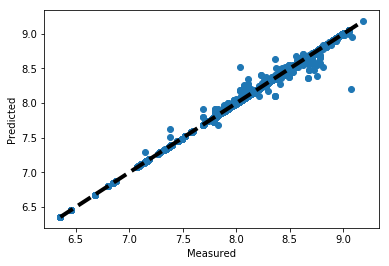

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.scatter(data_test_labels, rf_predictions)
ax.plot([data_test_labels.min(), data_test_labels.max()], [rf_predictions.min(), rf_predictions.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Century Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


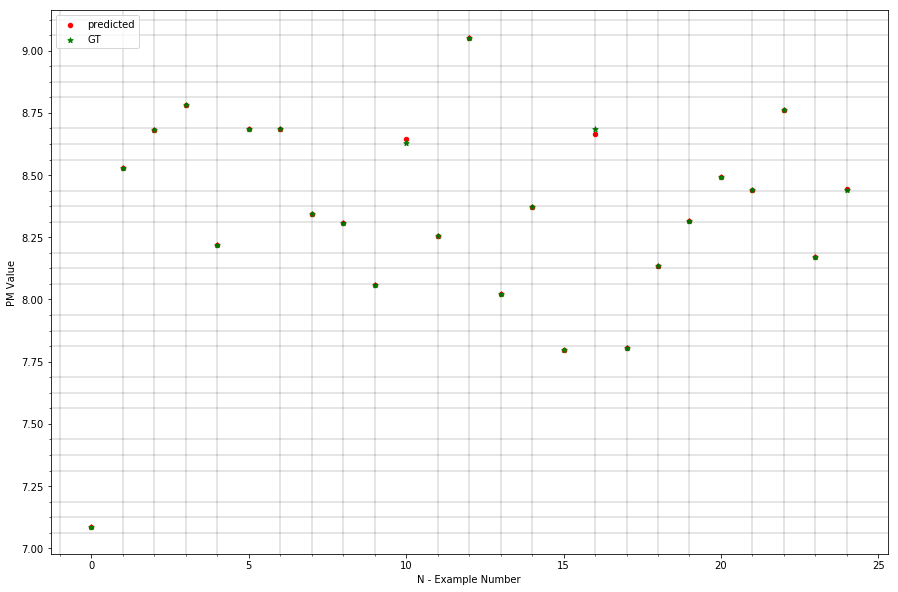

In [76]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(rf_predictions[:25])), rf_predictions[:25], s=20, c='r', marker="o", label='predicted')
ax1.scatter(range(len(data_test_labels[:25])),data_test_labels[:25], s=30, c='g', marker="*", label='GT')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', linewidth='0.2', color='black')
plt.legend(loc='upper left')
plt.ylabel('PM Value')
plt.xlabel('N - Example Number')
plt.show()